In [2]:
from pinpoint import Tracker, VideoReader
import pinpoint.utils as utils
import matplotlib.pyplot as plt
import time
import h5py
import glob
import cv2
import numpy as np

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
videos = glob.glob("/Volumes/Samsung_T3/Work/Videos/Barcode pilots/*.mp4")
videos

['/Volumes/Samsung_T3/Work/Videos/Barcode pilots/fish1_posttag_20171208_104104.low.mp4',
 '/Volumes/Samsung_T3/Work/Videos/Barcode pilots/fish5_posttag_20171208_111107.low.mp4',
 '/Volumes/Samsung_T3/Work/Videos/Barcode pilots/fish1_pretag_20171205_122028.low.mp4',
 '/Volumes/Samsung_T3/Work/Videos/Barcode pilots/fish4_tagday1_20171206_140416.low.mp4',
 '/Volumes/Samsung_T3/Work/Videos/Barcode pilots/fish1_tagday1_20171206_110503.low.mp4',
 '/Volumes/Samsung_T3/Work/Videos/Barcode pilots/fish1_tagday2_20171207_105620.low.mp4',
 '/Volumes/Samsung_T3/Work/Videos/Barcode pilots/fish2_posttag_20171208_114844.low.mp4',
 '/Volumes/Samsung_T3/Work/Videos/Barcode pilots/fish2_pretag_20171205_133511.low.mp4',
 '/Volumes/Samsung_T3/Work/Videos/Barcode pilots/fish2_tagday1_20171206_114339.low.mp4',
 '/Volumes/Samsung_T3/Work/Videos/Barcode pilots/fish2_tagday2_20171207_113008.low.mp4',
 '/Volumes/Samsung_T3/Work/Videos/Barcode pilots/fish3_pretag_20171205_141013.low.mp4',
 '/Volumes/Samsung_T3/Wo

In [6]:
tracker = Tracker(source=videos[17],
                  block_size=21,
                  offset=-5,
                  distance_threshold=20,
                  area_range=(100,600),
                  tolerance=0.1,
                  channel='green',
                  var_thresh=500,
                  resize=2)

In [7]:
tracker.load_dict('/Users/viveksridhar/Documents/Code/Python/pinpoint/barcodes/3x3_2bit/master_list.pkl')

True

In [8]:
name = 'fish5_tagday1_20171206_145020.low'

t0 = time.time()
fetch_dict = tracker.track(name + '.h5',batch_size=200, n_jobs=-1)
t1 = time.time()
dt = t1-t0
fps = tracker.total_frames()/dt
print(fps)

Process ForkPoolWorker-5:
Process ForkPoolWorker-2:
Process ForkPoolWorker-4:
Process ForkPoolWorker-3:
Process ForkPoolWorker-7:
Process ForkPoolWorker-6:
Process ForkPoolWorker-1:
Traceback (most recent call last):
Process ForkPoolWorker-8:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.

UnboundLocalError: local variable 'fetch_dict' referenced before assignment

In [9]:
#set n_jobs to 1 to get gray and threshold images as output in fetch_dict
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, squeeze=True, figsize=(50,100))
ax1.imshow(fetch_dict["gray"], cmap='gray', interpolation='none')
ax2.imshow(fetch_dict["thresh"], cmap='gray', interpolation='none')
plt.show()

NameError: name 'fetch_dict' is not defined

In [20]:
f = h5py.File(name + '.h5', 'r')

In [21]:
frame_idx = f['data/frame_idx'].value
corners = f['data/corners'].value
identity = f['data/identity'].value
distances = f['data/distances'].value

In [22]:
fps = f.attrs['fps']
codec = f.attrs['codec']
height = f.attrs['height']
width = f.attrs['width']
total_frames = f.attrs['total_frames']

In [23]:
f.close()

In [24]:
np.unique(identity[distances < 1])

array([ 1,  2,  6, 11, 13, 20, 21, 22, 25, 26, 28, 29], dtype=int32)

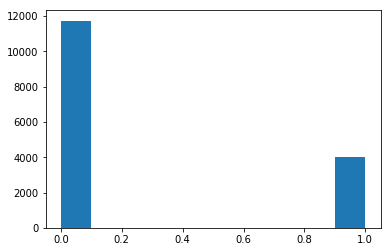

In [25]:
plt.hist(distances, bins=10)
plt.show()

# Verify threshold settings on a single frame

To check thresholding, use the code snippet below before running video through the tracker. This saves time by preventing you from checking threshold settings on a video and instead, checking it on a single frame

Also, it is worth keeping in mind that the thresholded image is only used to identify quadrilaterals. All further barcode detection is done on the original image. Hence, what is essential w.r.t. the thresholded image is to have barcodes as complete quadrilaterals and not split by black bits in it (this essentially increases number of edges of the polygon, thereby preventing detection of the barcode as a potential fish)

In [10]:
reader = VideoReader("/Volumes/Samsung_T3/Work/Videos/Barcode pilots/fish5_tagday1_20171206_145020.low.mp4")

In [11]:
frame = reader.read()

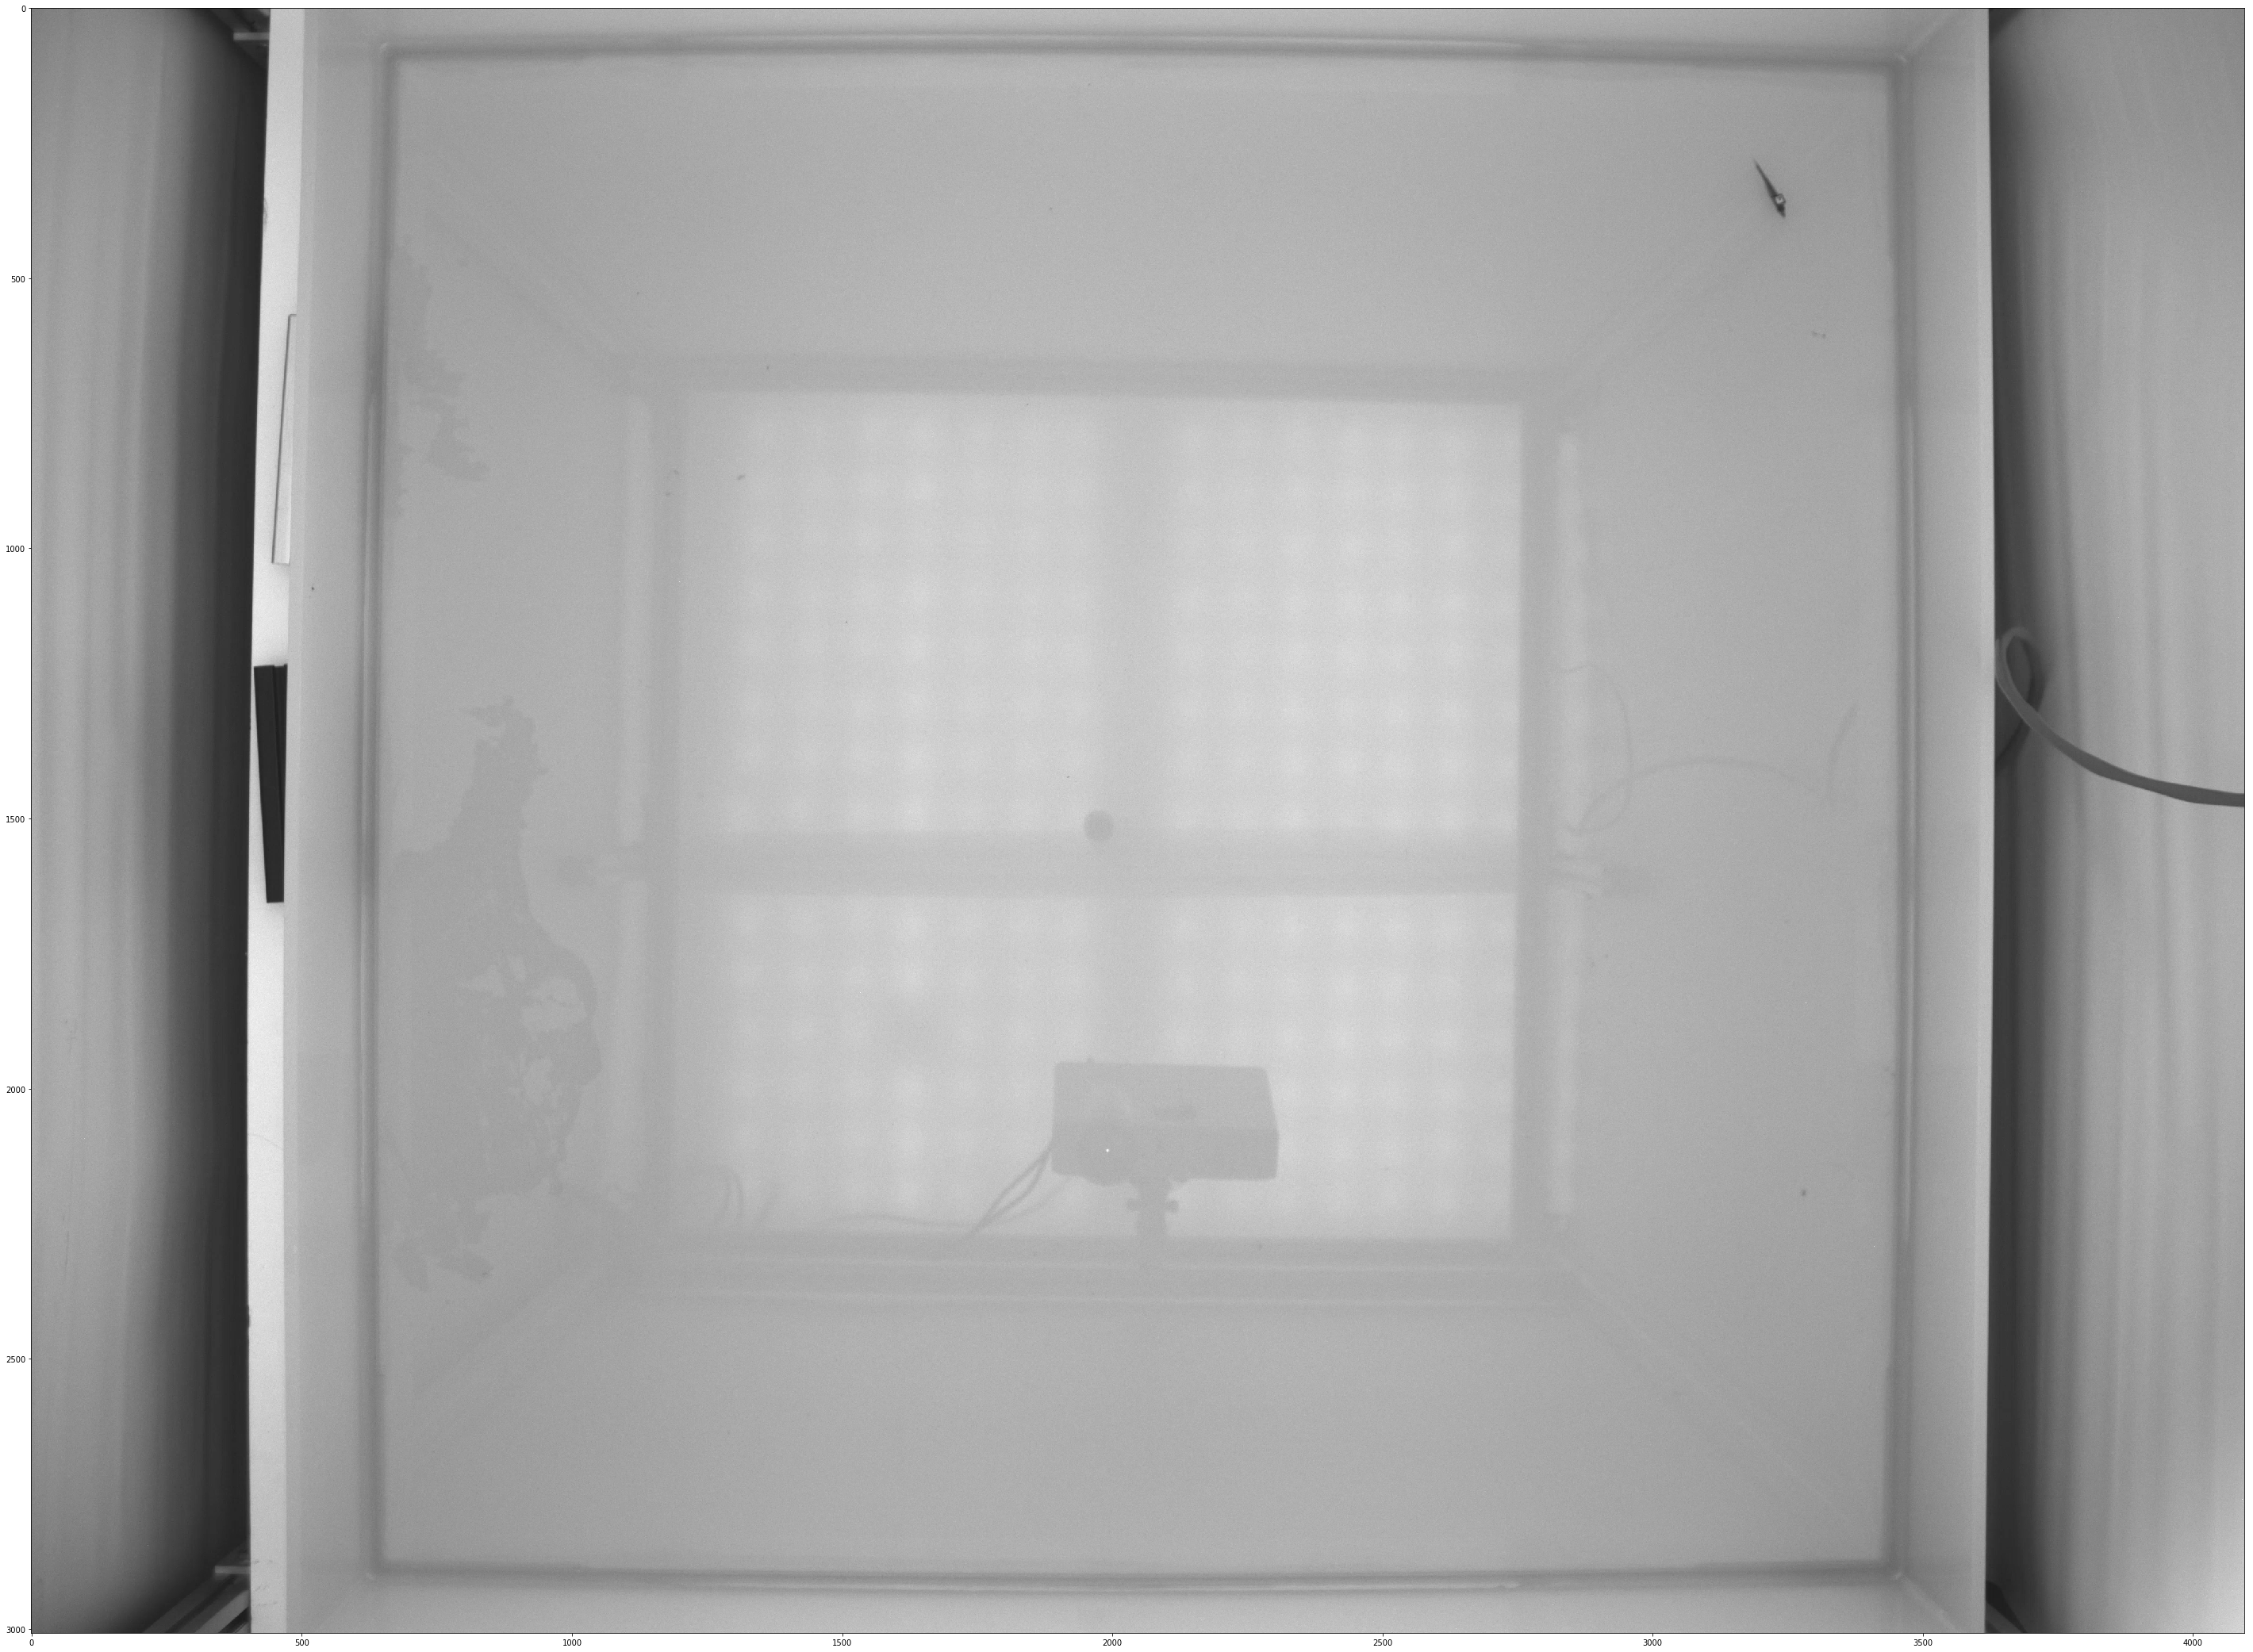

In [14]:
plt.figure(figsize=(50,50))
plt.imshow(frame)
plt.show()

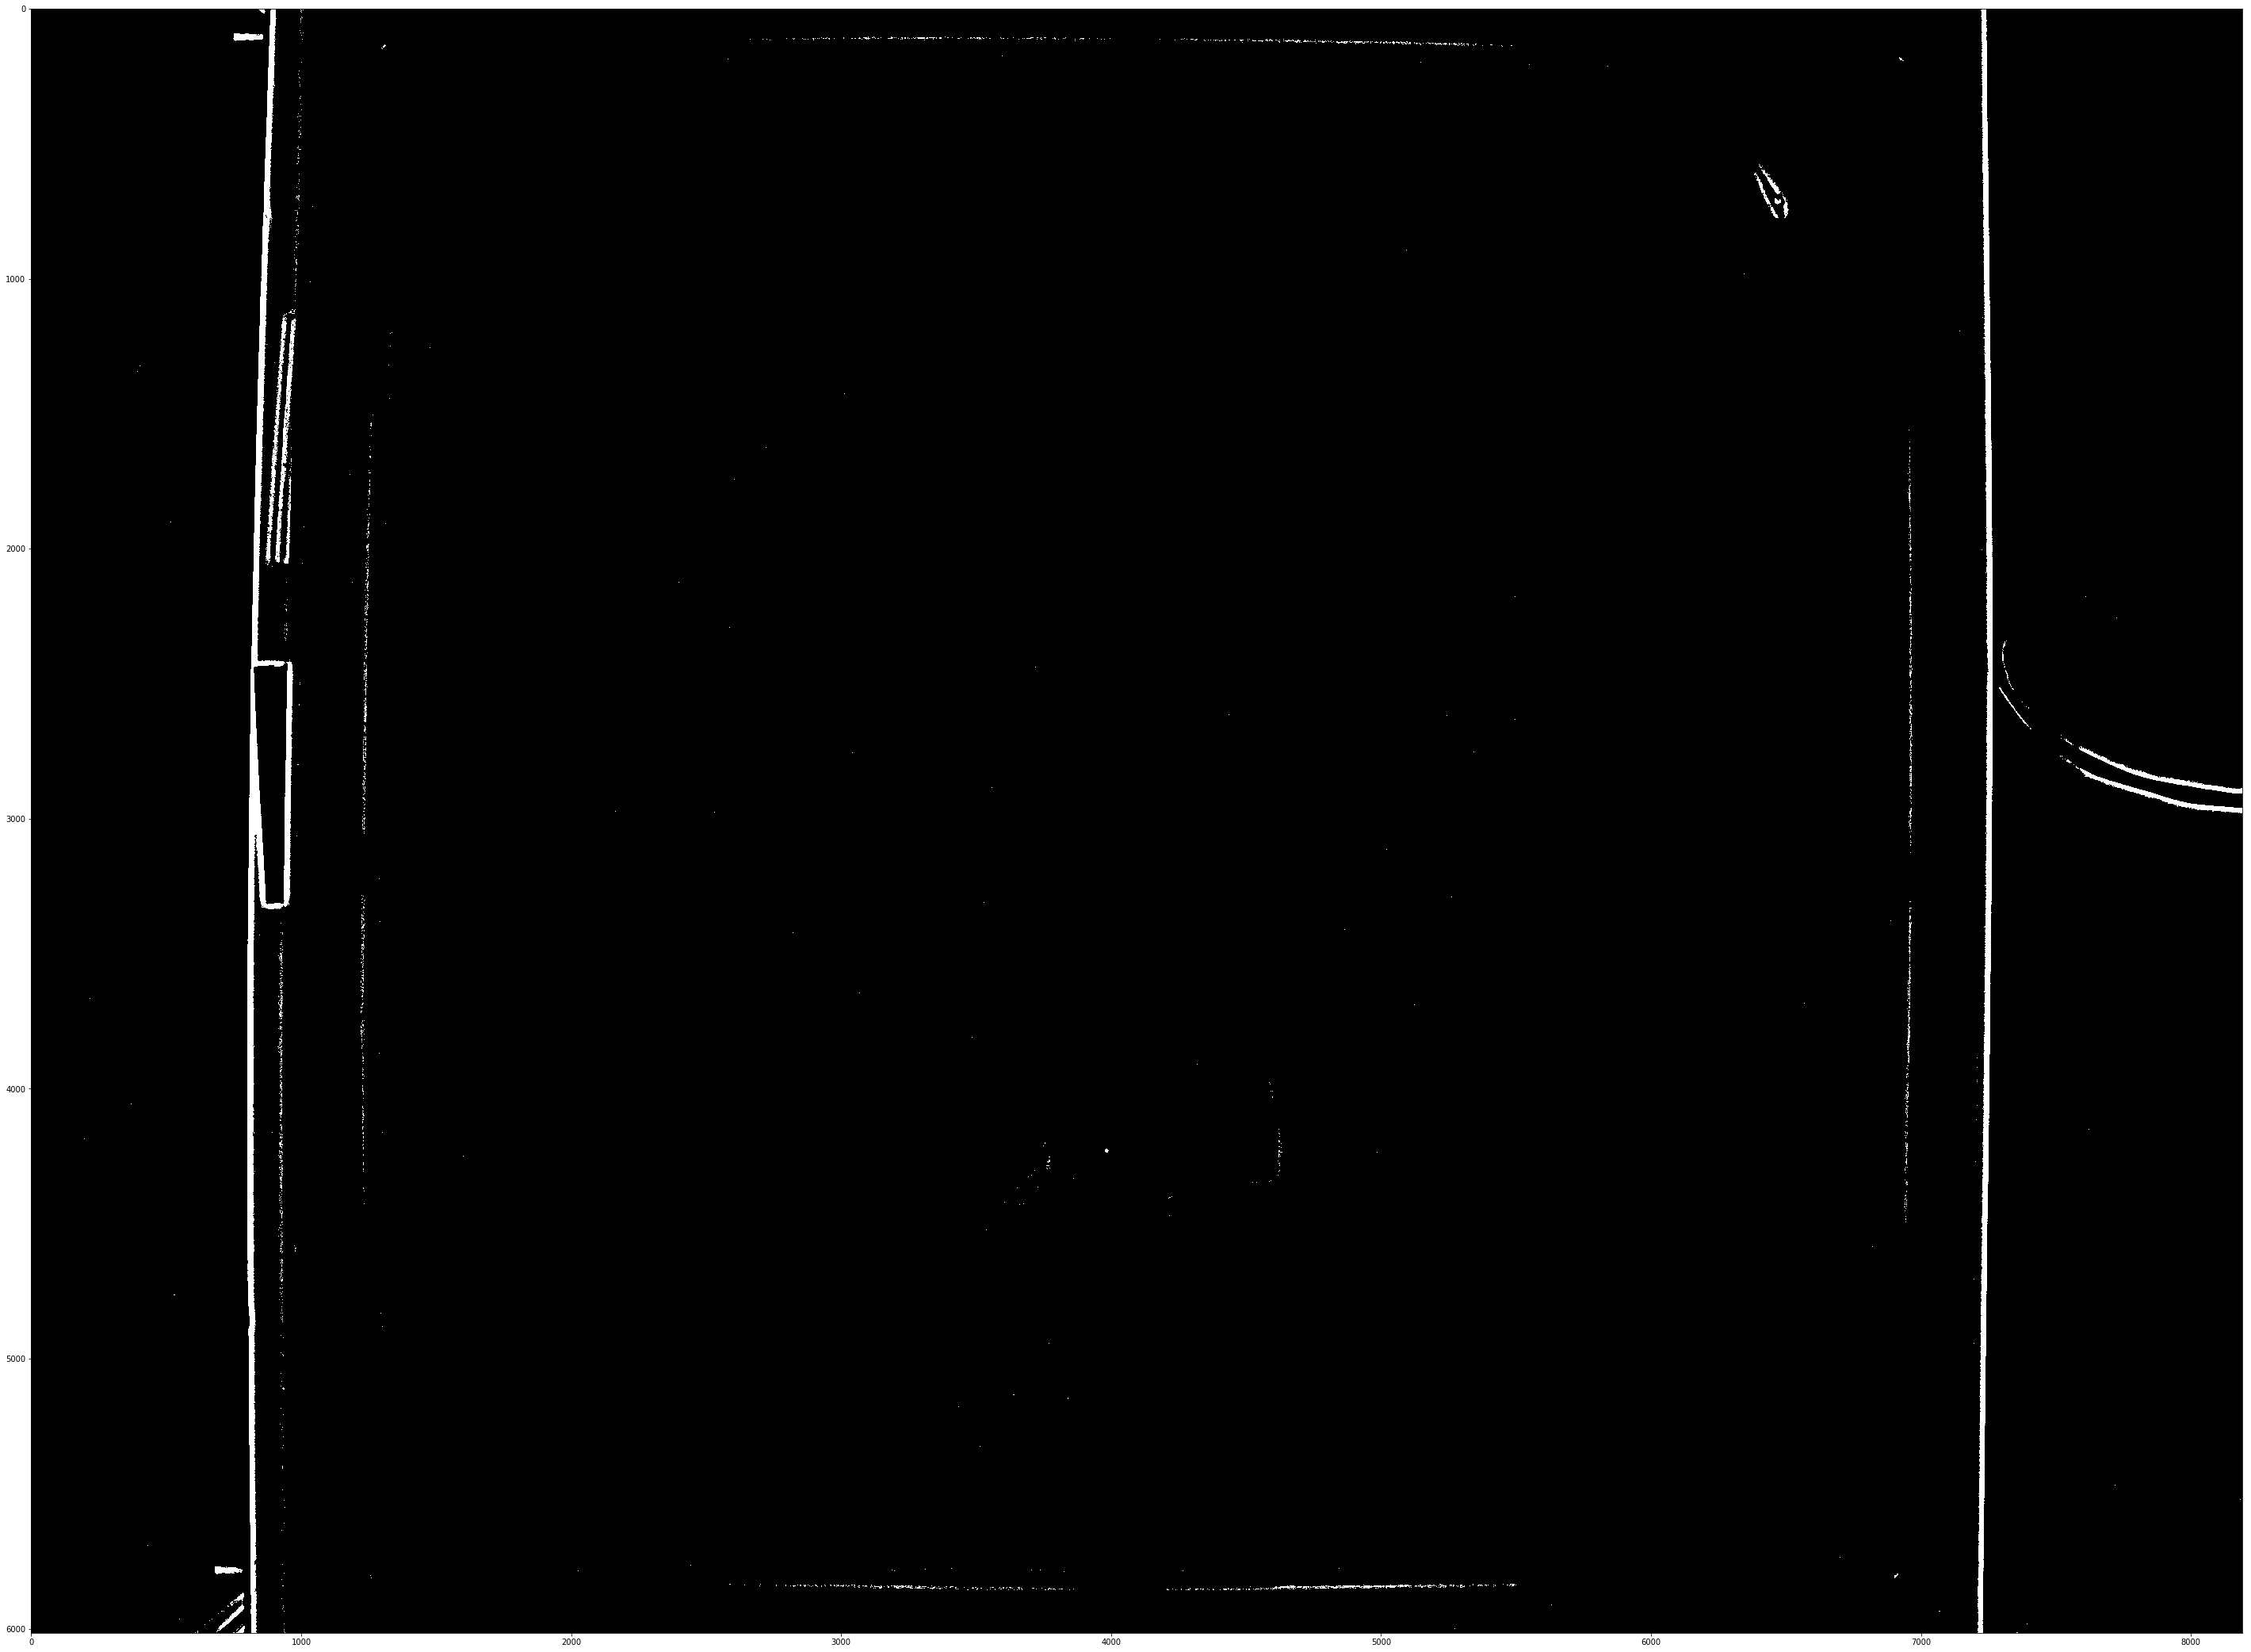

In [17]:
thresh = utils.get_threshold(cv2.resize(frame[...,1], (0,0), None, fx=2, fy=2), block_size=51, offset=-5)
plt.figure(figsize=(50,50))
plt.imshow(thresh, cmap='gray')
plt.show()